In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d akash2907/bird-species-classification

100% 1.37G/1.37G [00:16<00:00, 68.9MB/s]
100% 1.37G/1.37G [00:16<00:00, 88.9MB/s]


In [ ]:
!unzip bird-species-classification

Archive:  bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/

In [ ]:
#data augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/train_data/train_data",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 150 images belonging to 16 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/test_data/test_data",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 157 images belonging to 16 classes.


In [ ]:
x_train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:

# Build a CNN block

model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(16,activation='softmax')) # Output layer

In [ ]:

# Compiling the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

# Train model

model.fit_generator(x_train,
                    steps_per_epoch=len(x_train),
                    epochs=10,
                    validation_data=x_test,
                    validation_steps=len(x_test))

<ipython-input-43-a1c711957d2c>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,


Epoch 1/10
7/7 [==============================] - 112s 17s/step - loss: 4.9635 - accuracy: 0.0600 - val_loss: 2.9196 - val_accuracy: 0.0573
Epoch 2/10
7/7 [==============================] - 126s 21s/step - loss: 2.7797 - accuracy: 0.1800 - val_loss: 2.8065 - val_accuracy: 0.1656
Epoch 3/10
7/7 [==============================] - 126s 20s/step - loss: 2.5674 - accuracy: 0.2533 - val_loss: 2.8312 - val_accuracy: 0.1847
Epoch 4/10
7/7 [==============================] - 126s 20s/step - loss: 2.5562 - accuracy: 0.1933 - val_loss: 2.7042 - val_accuracy: 0.1847
Epoch 5/10
7/7 [==============================] - 131s 20s/step - loss: 2.2576 - accuracy: 0.2467 - val_loss: 2.8699 - val_accuracy: 0.1975
Epoch 6/10
7/7 [==============================] - 126s 20s/step - loss: 2.1129 - accuracy: 0.3067 - val_loss: 2.6307 - val_accuracy: 0.2357
Epoch 7/10
7/7 [==============================] - 127s 20s/step - loss: 2.0295 - accuracy: 0.2933 - val_loss: 2.6785 - val_accuracy: 0.2357
Epoch 8/10
7/7 [====

In [ ]:
# Save model

model.save('birds.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img('C:/Users/namee/Downloads/output.png',target_size=(64,64)) # Reading image
img

In [ ]:

x = image.img_to_array(img)
x

array([[[165., 192.,  97.],
        [172., 195., 114.],
        [174., 196., 121.],
        ...,
        [218., 235., 142.],
        [219., 235., 146.],
        [220., 236., 147.]],

       [[164., 193.,  94.],
        [171., 195., 110.],
        [173., 196., 117.],
        ...,
        [219., 235., 144.],
        [219., 236., 147.],
        [220., 236., 153.]],

       [[158., 191.,  82.],
        [169., 193., 105.],
        [171., 194., 111.],
        ...,
        [220., 236., 147.],
        [220., 237., 153.],
        [220., 237., 157.]],

       ...,

       [[101., 161., 108.],
        [104., 158., 107.],
        [103., 156., 100.],
        ...,
        [151., 177., 115.],
        [157., 183., 129.],
        [170., 188., 144.]],

       [[105., 163., 110.],
        [109., 162., 108.],
        [111., 160., 104.],
        ...,
        [114., 156.,  62.],
        [118., 159.,  71.],
        [151., 172., 117.]],

       [[108., 166., 110.],
        [112., 164., 108.],
        [113., 1

In [ ]:
img = np.expand_dims(x,axis=0)


In [ ]:

img


array([[[[165., 192.,  97.],
         [172., 195., 114.],
         [174., 196., 121.],
         ...,
         [218., 235., 142.],
         [219., 235., 146.],
         [220., 236., 147.]],

        [[164., 193.,  94.],
         [171., 195., 110.],
         [173., 196., 117.],
         ...,
         [219., 235., 144.],
         [219., 236., 147.],
         [220., 236., 153.]],

        [[158., 191.,  82.],
         [169., 193., 105.],
         [171., 194., 111.],
         ...,
         [220., 236., 147.],
         [220., 237., 153.],
         [220., 237., 157.]],

        ...,

        [[101., 161., 108.],
         [104., 158., 107.],
         [103., 156., 100.],
         ...,
         [151., 177., 115.],
         [157., 183., 129.],
         [170., 188., 144.]],

        [[105., 163., 110.],
         [109., 162., 108.],
         [111., 160., 104.],
         ...,
         [114., 156.,  62.],
         [118., 159.,  71.],
         [151., 172., 117.]],

        [[108., 166., 110.],
       

In [ ]:

pred = model.predict(img)
pred

1/1 [==============================] - 0s 129ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:

np.argmax(pred)

0

In [ ]:
op = ['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt'] # Creating list
op[np.argmax(pred)] # List indexing with output

'blasti'

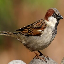

In [ ]:

img1 = image.load_img('/content/testpng.png',target_size=(64,64)) # Reading image
img1


In [ ]:
x = image.img_to_array(img1)
x

array([[[ 98., 114.,  26.],
        [ 92., 109.,  23.],
        [ 92., 106.,  23.],
        ...,
        [167., 133.,  86.],
        [171., 132.,  89.],
        [171., 129.,  90.]],

       [[100., 116.,  28.],
        [ 94., 111.,  25.],
        [ 94., 107.,  25.],
        ...,
        [167., 133.,  86.],
        [169., 131.,  87.],
        [169., 127.,  88.]],

       [[ 98., 112.,  28.],
        [ 97., 111.,  28.],
        [ 95., 108.,  28.],
        ...,
        [166., 132.,  87.],
        [169., 130.,  87.],
        [171., 129.,  88.]],

       ...,

       [[171., 132.,  93.],
        [174., 134.,  95.],
        [176., 136.,  97.],
        ...,
        [147., 124.,  97.],
        [130., 117.,  94.],
        [167., 149., 129.]],

       [[174., 135.,  95.],
        [175., 136.,  97.],
        [177., 138.,  99.],
        ...,
        [156., 138., 112.],
        [159., 147., 125.],
        [174., 158., 139.]],

       [[176., 137.,  96.],
        [177., 138.,  98.],
        [179., 1

In [ ]:

img1 = np.expand_dims(x,axis=0)

In [ ]:

img1

array([[[[ 98., 114.,  26.],
         [ 92., 109.,  23.],
         [ 92., 106.,  23.],
         ...,
         [167., 133.,  86.],
         [171., 132.,  89.],
         [171., 129.,  90.]],

        [[100., 116.,  28.],
         [ 94., 111.,  25.],
         [ 94., 107.,  25.],
         ...,
         [167., 133.,  86.],
         [169., 131.,  87.],
         [169., 127.,  88.]],

        [[ 98., 112.,  28.],
         [ 97., 111.,  28.],
         [ 95., 108.,  28.],
         ...,
         [166., 132.,  87.],
         [169., 130.,  87.],
         [171., 129.,  88.]],

        ...,

        [[171., 132.,  93.],
         [174., 134.,  95.],
         [176., 136.,  97.],
         ...,
         [147., 124.,  97.],
         [130., 117.,  94.],
         [167., 149., 129.]],

        [[174., 135.,  95.],
         [175., 136.,  97.],
         [177., 138.,  99.],
         ...,
         [156., 138., 112.],
         [159., 147., 125.],
         [174., 158., 139.]],

        [[176., 137.,  96.],
       

In [ ]:

pred = model.predict(img1)
pred


1/1 [==============================] - 0s 32ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:

np.argmax(pred)

0

In [ ]:
op = ['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt'] # Creating list
op[np.argmax(pred)] # List indexing with output

'blasti'